# Vollyball National League 2023 - EDA
---
The objective of this project is to perform Exploratory Data Analysis (EDA) on the volleyball players dataset to understand its structure, identify patterns, detect outliers, and generate insights

---
### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Loading Data
This dataset contains names and other attributes of almost 130 vollyball players. There are 10 attributes included in dataset.

**Feature Description:**
* Player: name of the player
* Country: country of player which he belongs
* Age: age of the player
* Attack: rating
* Block: rating
* Serve: rating
* Set: rating
* Dig: rating
* Receive: rating
* Position: position at which a player plays.

In [2]:
df = pd.read_csv("VNL2023.csv")

In [3]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [4]:
df.shape

(131, 10)

---
### Data Preprocessing

In [5]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [6]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

---
### Correlation Matrix
- This helps us understand relation of one feature with other.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

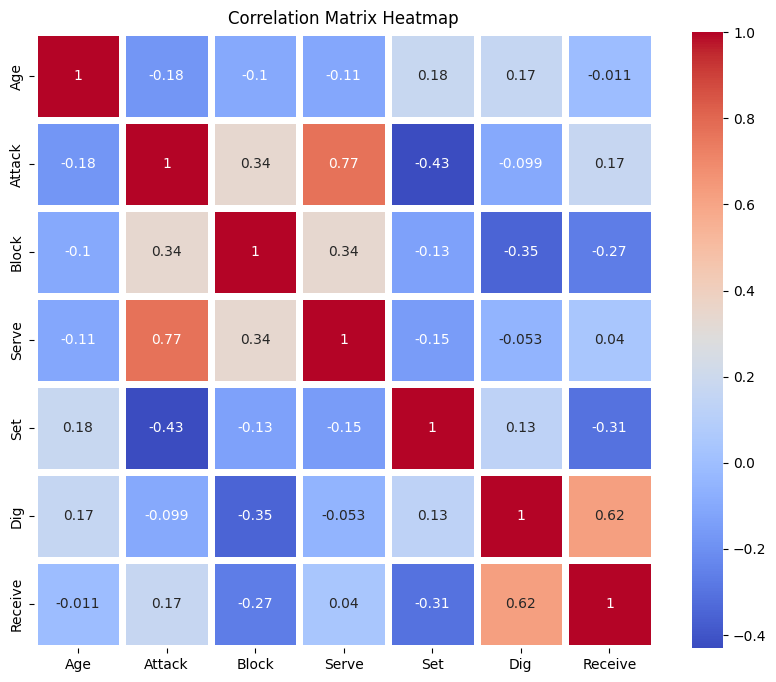

In [8]:
plt.figure(figsize=(10,8))
numeric_cols= df.select_dtypes(include=["int","float"]).columns
corr_matrix= df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot= True, cmap="coolwarm", linewidth=5)
plt.title("Correlation Matrix Heatmap")

**We can clearly see that "serve" and "Attack" have high correlation and "Set" and "Attack" has the least.**

---
**How is the distribution of positions represented in the dataset, and what percentage does each position contribute to the overall total?**

In [9]:
position_counts= df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Position')

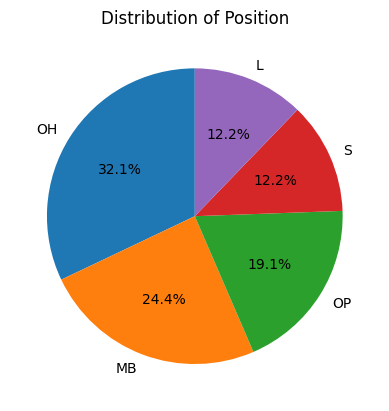

In [10]:
plt.pie(position_counts, labels= position_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Position")

---
**What are the top 5 countries with the highest average attack scores?**

In [11]:
avg_attack_by_country = df.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending= False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

Text(0, 0.5, 'Average Attack')

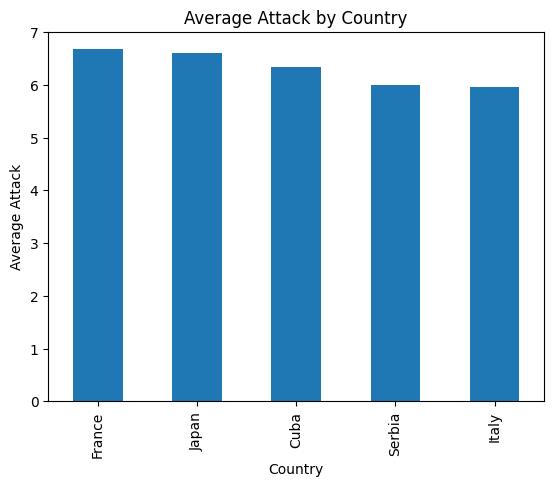

In [12]:
avg_attack_by_country.sort_values(ascending= False).head(5).plot(kind="bar")
plt.title("Average Attack by Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")

---
**What is the average serve score for players at each age?**

In [13]:
avg_serve_by_age= df.groupby("Age")["Serve"].mean()
avg_serve_by_age

Age
19    0.200000
20    0.880000
21    0.770000
22    0.534286
23    0.526667
24    0.640667
25    0.165714
26    0.681053
27    0.662500
28    0.667273
29    0.477500
30    0.429231
31    0.910000
32    0.290000
33    0.321429
34    0.026667
35    0.666667
36    0.660000
37    0.270000
38    0.400000
41    0.000000
Name: Serve, dtype: float64

---
**Which players have the highest attack scores across different positions and countries, and who are the top 20 performers?**

In [14]:
df.groupby(["Player","Position","Country"])["Attack"].max().reset_index().sort_values(ascending=False, by="Attack").head(20)

,Player,Position,Country,Attack
42,Ichikawa Yuki,OH,Japan,15.80
0,Abdel-Aziz Nimir,OP,Nederland,15.33
27,Faure Theo,OP,France,15.25
37,Herrera Jaime Jesus,OP,Cuba,15.00
65,Luburic Drazen,OP,Serbia,14.33
74,Nikolov Aleksandar,OH,Bulgaria,14.25
130,Zhang Jingyin,OH,China,13.50
116,Urnaut Tine,OH,Slovenia,12.62
104,Souza Alen,OP,Brazil,12.46
63,Lopez Castro Miguel Angel,OH,Cuba,12.33


---
**What is the total number of digs recorded by players from each country?**

In [15]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

---
**Is there any visible relationship between players' block and receive performance?**

Text(0, 0.5, 'Receive')

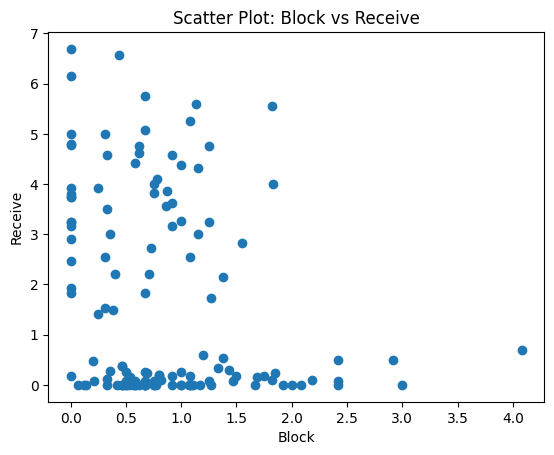

In [16]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")

---
**What is the distribution of serve scores among players, including any outliers or variability?**

Text(0.5, 0, 'Serve')

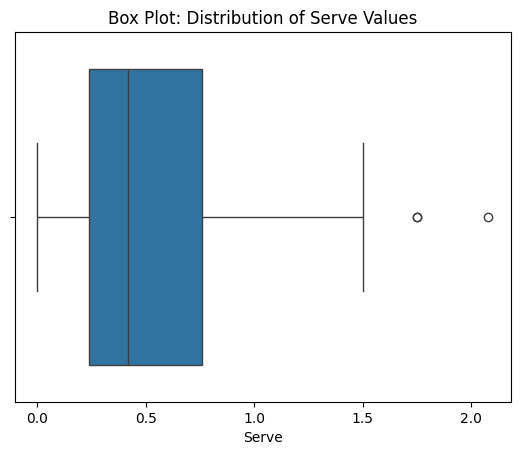

In [17]:
sns.boxplot(x= df["Serve"])
plt.title("Box Plot: Distribution of Serve Values")
plt.xlabel("Serve")

---
**How is the age of players distributed within the dataset?**

Text(0, 0.5, 'Frequency')

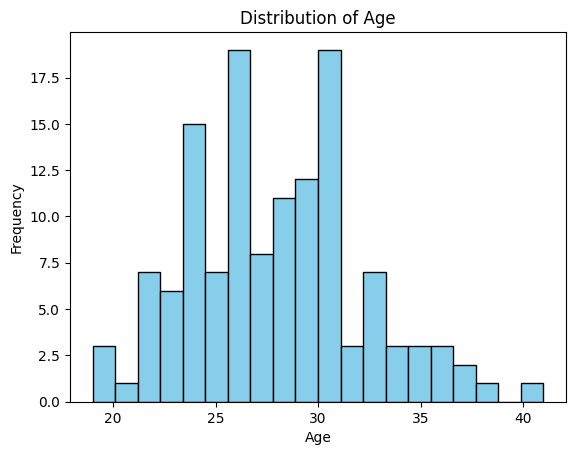

In [18]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor= "black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

---
**How does the average attack score vary across different player positions?**

Text(0, 0.5, 'Average Attack')

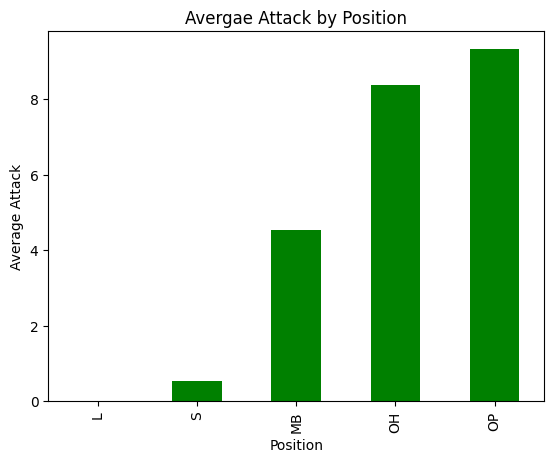

In [19]:
avg_attack_by_position= df.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending = True).plot(kind="bar", color="green")
plt.title("Avergae Attack by Position")
plt.xlabel("Position")
plt.ylabel("Average Attack")

---
**How does the average serve performance change across different age groups?**

Text(0, 0.5, 'Average Serve')

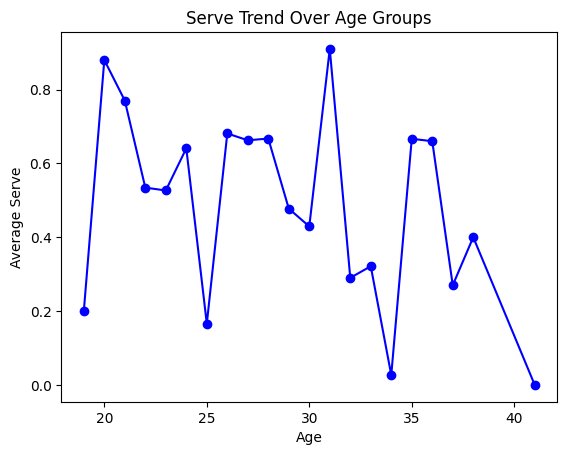

In [20]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()
serve_trend_by_age.plot(kind="line", marker="o", linestyle="-", color="blue")
plt.title("Serve Trend Over Age Groups")
plt.xlabel("Age")
plt.ylabel("Average Serve")

---
**What are the total attack and block contributions from players of each country?**

In [21]:
total_attack_block_country= df.groupby("Country")[["Attack","Block"]].sum()
total_attack_block_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


---
**How do countries compare in terms of their total combined attack and block contributions?**

Text(0, 0.5, 'Total Value')

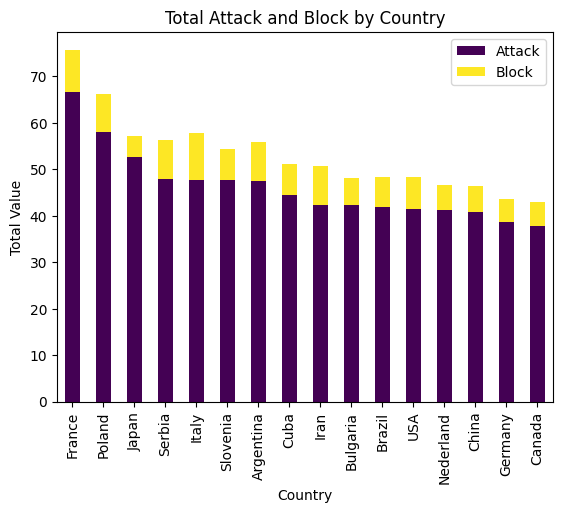

In [22]:
total_attack_block_country.sort_values(ascending= False, by="Attack").plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")

---